In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
import seaborn as sns
import pandas as pd

## Simple analysis
Based on: *"If the probability to observe k or more events among N patients, assuming an event probability of 10%, is less than 10%, we pause"*

example. for 20 patients 5 or more events have the following probability:

In [8]:
(1 - binom.cdf(4, 20,0.1))*100

4.317449528446349

as opposed to 4 or more events:

In [9]:
(1 - binom.cdf(3, 20,0.1))*100

13.29533234343353

n=20, p=0.10
Upper limit for 20 patients and 10% threshold: 5 (stop here)
 We have a probability of 4.32% to observe 5.0 or more events
 And a probability of 13.30% to observe 3.0 or more events


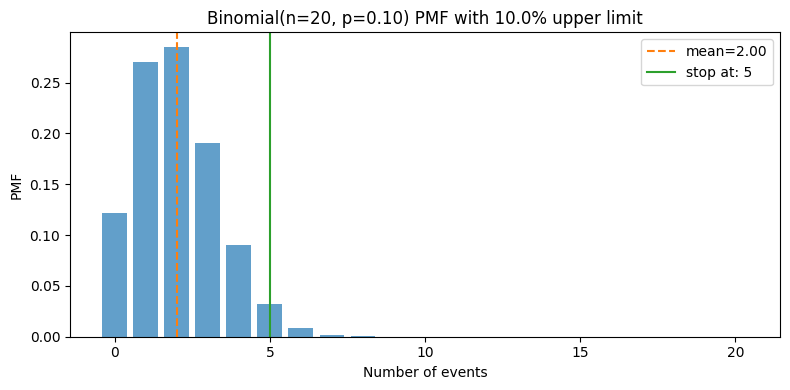

In [10]:
upper_limit = 0.1
n = 20
p = 0.10

upper = binom.ppf(1 - upper_limit, n, p) + 1
mean = binom.mean(n, p)
std = binom.std(n, p)

print(f"n={n}, p={p:.2f}")
print(f"Upper limit for {n} patients and 10% threshold: {int(upper)} (stop here)")
print(f' We have a probability of {(1-binom.cdf(upper - 1, n, p))*100:.2f}% to observe {upper} or more events')
print(f' And a probability of {(1-binom.cdf(upper - 2, n, p))*100:.2f}% to observe {upper-2} or more events')


k = np.arange(0, n + 1)
pmf = binom.pmf(k, n, p)

plt.figure(figsize=(8, 4))
plt.bar(k, pmf, color='C0', alpha=0.7)
plt.axvline(mean, color='C1', linestyle='--', label=f"mean={mean:.2f}")
plt.axvline(upper, color='C2', linestyle='-', label=f"stop at: {int(upper)}")
plt.xlabel("Number of events")
plt.ylabel("PMF")
plt.title(f"Binomial(n={n}, p={p:.2f}) PMF with {upper_limit*100}% upper limit")
plt.legend()
plt.tight_layout()
plt.show()

---

## 📋 Complete Interim Analysis Protocol

**Purpose:** Monitor if the event rate is higher than 10%. If it looks too high, pause or stop the trial.

**Key Concepts:**
- **N** = Number of patients with ≥6 months follow-up
- **k** = Number of events observed in those N patients
- **p₀ = 0.10** = Null hypothesis (acceptable event rate)

---

### **TIMING OF INTERIM ANALYSES**

Interim analyses will be conducted:
1. **First interim:** When 60 patients are recruited

*Note: You may need to WAIT after recruitment for patients to reach 6-month follow-up*

---

### **DECISION RULES**

#### **Step 1: Check Minimum Sample Size**
- Count patients with ≥6 months follow-up → **N**
- If **N < 20**: WAIT until 20 patients have 6-month follow-up
- If **N ≥ 20**: Proceed to Step 2

#### **Step 2: First Evaluation (α₁ = 10%)**
- Count events in N patients → **k**
- Calculate: P(X ≥ k | N, p=0.1)
- **If P < 10%**: PAUSE recruitment for 6 months → Go to Step 3
- **If P ≥ 10%**: CONTINUE recruitment

#### **Step 3: Second Evaluation After Pause (α₂ = 5%)**
- After 6 months, recount N and k (more patients should have 6-month follow-up now)
- Calculate: P(X ≥ k | N, p=0.1)  
- **If P < 5%**: TERMINATE study (stop recruiting permanently)
- **If P ≥ 5%**: RESUME recruitment

---

### **PATIENT INCLUSION RULES**

**For N (denominator):**
- Include: All patients with ≥6 months follow-up time
- Include: Patients who dropped out after 6 months (they had opportunity for event)
- Exclude: Patients censored before 6 months

**For k (numerator):**
- Include: All observed events within 6 months
- Exclude: Events in patients with <6 months follow-up

---
### **Censoring Rules Need Clarity**

**Scenario A:** Patient enrolled, had 3 months follow-up, then dropped out
- Include in N? **NO** (didn't reach 6 months)
- Include in k? **NO** (insufficient follow-up)

**Scenario B:** Patient enrolled, had 6 months follow-up, then dropped out
- Include in N? **YES** (completed required follow-up)
- Include in k? **YES if event occurred in first 6 months, NO if no event**

**Scenario C:** Patient enrolled, had 8 months follow-up, event at month 7
- Include in N? **YES** (has ≥6 months)
- Include in k? **NO** (event occurred after 6-month window) OR **YES** (depends on your definition)

**→ Clarify your definition!**

---

## 📊 **VISUAL DECISION FLOWCHART**

```
START: Recruit Patients
        ↓
    Reach 60 patients recruited
        ↓
    Wait for 6-month follow-up
        ↓
    Count N (patients with ≥6mo f/u)
        ↓
    ┌─────────────┐
    │  N < 20?    │
    └─────────────┘
       YES ↓        NO ↓
    WAIT FOR     Count events k
    MORE F/U         ↓
        ↓        Calculate P(X≥k|N,0.1)
        └────→       ↓
              ┌─────────────┐
              │  P < 10%?   │
              └─────────────┘
           YES ↓        NO ↓
        PAUSE 6mo    CONTINUE
              ↓           ↓
        Wait 6 months  Recruit to
        Recount N,k    120 patients
              ↓           ↓
        Calculate P    [End]
              ↓
        ┌─────────────┐
        │  P < 5%?    │
        └─────────────┘
           YES ↓        NO ↓
        TERMINATE   RESUME
         [END]         ↓
                   Continue to
                   120 patients
                       ↓
                     [End]
```

---

## 📊 **INTERIM ANALYSIS LOOKUP TABLE**

**Complete reference table for N = 20 to 59 patients with 6-month follow-up**

Decision rule: **PAUSE if observed events ≥ cutoff**

In [11]:
# ===== COMPLETE LOOKUP TABLE: N=20 to N=59 =====
p_null = 0.10  # Null hypothesis: 10% event rate
alpha_interim = 0.10  # Threshold for pausing

# Generate lookup table
lookup_data = []

for N in range(20, 60):  # N = 20 to 59
    # Find cutoff: minimum k where P(X >= k) < alpha_interim
    # add 1 because ppf gives the largest k with P(X <= k) <= q
    cutoff = int(binom.ppf(1 - alpha_interim, N, p_null) + 1)
    
    # Calculate probabilities for verification
    prob_at_cutoff = 1 - binom.cdf(cutoff - 1, N, p_null)
    prob_below_cutoff = 1 - binom.cdf(cutoff - 2, N, p_null) if cutoff > 0 else 1.0
    
    # Expected number of events under H0
    expected = N * p_null
    
    # How many events above expected
    excess = cutoff - expected
    
    lookup_data.append({
        'N': N,
        'Expected Events (10%)': f'{expected:.1f}',
        'Cutoff': cutoff,
        'Excess': f'{excess:.1f}',
        'P(X≥cutoff)': f'{prob_at_cutoff:.4f}',
        'Decision': f'Pause if events ≥ {cutoff}'
    })

# Create DataFrame
df_lookup = pd.DataFrame(lookup_data)
df_lookup.to_csv('interim_monitoring_lookup_table.csv', index=False)
print("INTERPRETATION:")
print("  • Expected = What you'd expect under 10% event rate")
print("  • Cutoff = Minimum events to trigger pause")
print("  • Excess = How many events above expected needed to pause")
print("  • P(X≥cutoff) = Probability under null hypothesis")
print("="*85)
df_lookup


INTERPRETATION:
  • Expected = What you'd expect under 10% event rate
  • Cutoff = Minimum events to trigger pause
  • Excess = How many events above expected needed to pause
  • P(X≥cutoff) = Probability under null hypothesis


,N,Expected Events (10%),Cutoff,Excess,P(X≥cutoff),Decision
0,20,2.0,5,3.0,0.0432,Pause if events ≥ 5
1,21,2.1,5,2.9,0.0522,Pause if events ≥ 5
2,22,2.2,5,2.8,0.0621,Pause if events ≥ 5
3,23,2.3,5,2.7,0.0731,Pause if events ≥ 5
4,24,2.4,5,2.6,0.0851,Pause if events ≥ 5
5,25,2.5,5,2.5,0.0980,Pause if events ≥ 5
6,26,2.6,6,3.4,0.0399,Pause if events ≥ 6
7,27,2.7,6,3.3,0.0471,Pause if events ≥ 6
8,28,2.8,6,3.2,0.0550,Pause if events ≥ 6
9,29,2.9,6,3.1,0.0637,Pause if events ≥ 6


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


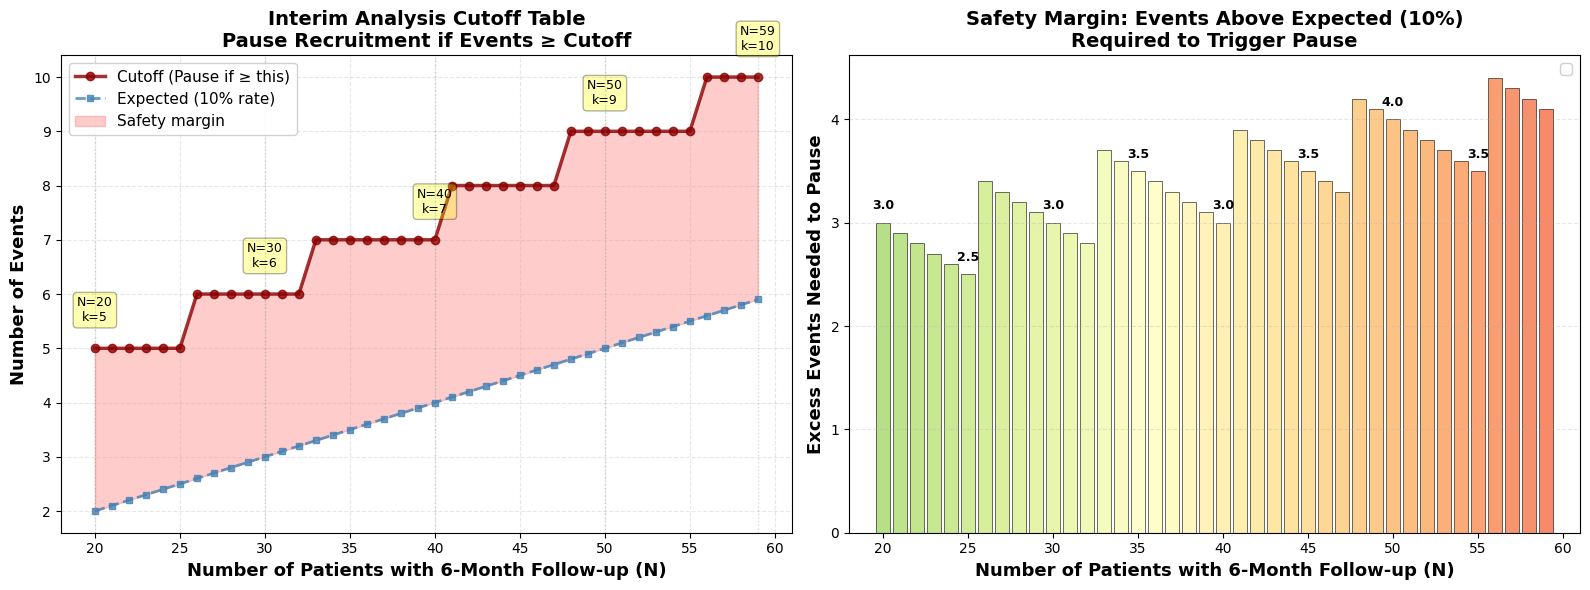


📊 KEY INSIGHTS:
  • Average safety margin: 3.45 excess events needed
  • Minimum safety margin: 2.50 (at N=25)
  • Maximum safety margin: 4.40 (at N=56)


In [12]:
# ===== VISUALIZATION: CUTOFF VS SAMPLE SIZE =====

# Extract data for plotting
N_values = df_lookup['N'].values
cutoff_values = df_lookup['Cutoff'].values
expected_values = [float(e) for e in df_lookup['Expected Events (10%)'].values]

# Create figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# LEFT PLOT: Cutoff and Expected values
ax1.plot(N_values, cutoff_values, 'o-', linewidth=2.5, markersize=6, 
         color='darkred', label='Cutoff (Pause if ≥ this)', alpha=0.8)
ax1.plot(N_values, expected_values, 's--', linewidth=2, markersize=5, 
         color='steelblue', label='Expected (10% rate)', alpha=0.8)
ax1.fill_between(N_values, expected_values, cutoff_values, 
                  alpha=0.2, color='red', label='Safety margin')

# Add reference lines for key sample sizes
for n_ref in [20, 30, 40, 50, 59]:
    if n_ref in N_values:
        idx = list(N_values).index(n_ref)
        ax1.axvline(n_ref, color='gray', linestyle=':', alpha=0.3, linewidth=1)
        ax1.text(n_ref, cutoff_values[idx] + 0.5, f'N={n_ref}\nk={cutoff_values[idx]}', 
                ha='center', fontsize=9, bbox=dict(boxstyle='round,pad=0.3', 
                facecolor='yellow', alpha=0.3))

ax1.set_xlabel('Number of Patients with 6-Month Follow-up (N)', fontsize=13, fontweight='bold')
ax1.set_ylabel('Number of Events', fontsize=13, fontweight='bold')
ax1.set_title('Interim Analysis Cutoff Table\nPause Recruitment if Events ≥ Cutoff', 
              fontsize=14, fontweight='bold')
ax1.legend(loc='upper left', fontsize=11, framealpha=0.9)
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.set_xlim(18, 61)

# RIGHT PLOT: Excess events needed
excess_values = [float(e) for e in df_lookup['Excess'].values]
colors = plt.cm.RdYlGn_r(np.linspace(0.3, 0.8, len(N_values)))

bars = ax2.bar(N_values, excess_values, color=colors, alpha=0.8, edgecolor='black', linewidth=0.5)

# Add value labels on bars for every 5th value
for i, (n, exc) in enumerate(zip(N_values, excess_values)):
    if n % 5 == 0:
        ax2.text(n, exc + 0.1, f'{exc:.1f}', ha='center', va='bottom', 
                fontsize=9, fontweight='bold')

ax2.set_xlabel('Number of Patients with 6-Month Follow-up (N)', fontsize=13, fontweight='bold')
ax2.set_ylabel('Excess Events Needed to Pause', fontsize=13, fontweight='bold')
ax2.set_title('Safety Margin: Events Above Expected (10%)\nRequired to Trigger Pause', 
              fontsize=14, fontweight='bold')
ax2.legend(loc='upper right', fontsize=11, framealpha=0.9)
ax2.grid(axis='y', alpha=0.3, linestyle='--')
ax2.set_xlim(18, 61)

plt.tight_layout()
plt.show()

print("\n📊 KEY INSIGHTS:")
print(f"  • Average safety margin: {np.mean(excess_values):.2f} excess events needed")
print(f"  • Minimum safety margin: {np.min(excess_values):.2f} (at N={N_values[np.argmin(excess_values)]})")
print(f"  • Maximum safety margin: {np.max(excess_values):.2f} (at N={N_values[np.argmax(excess_values)]})")


🎁 ADDITIONAL ANALYSIS: Probability of Observing Cutoff or More Events


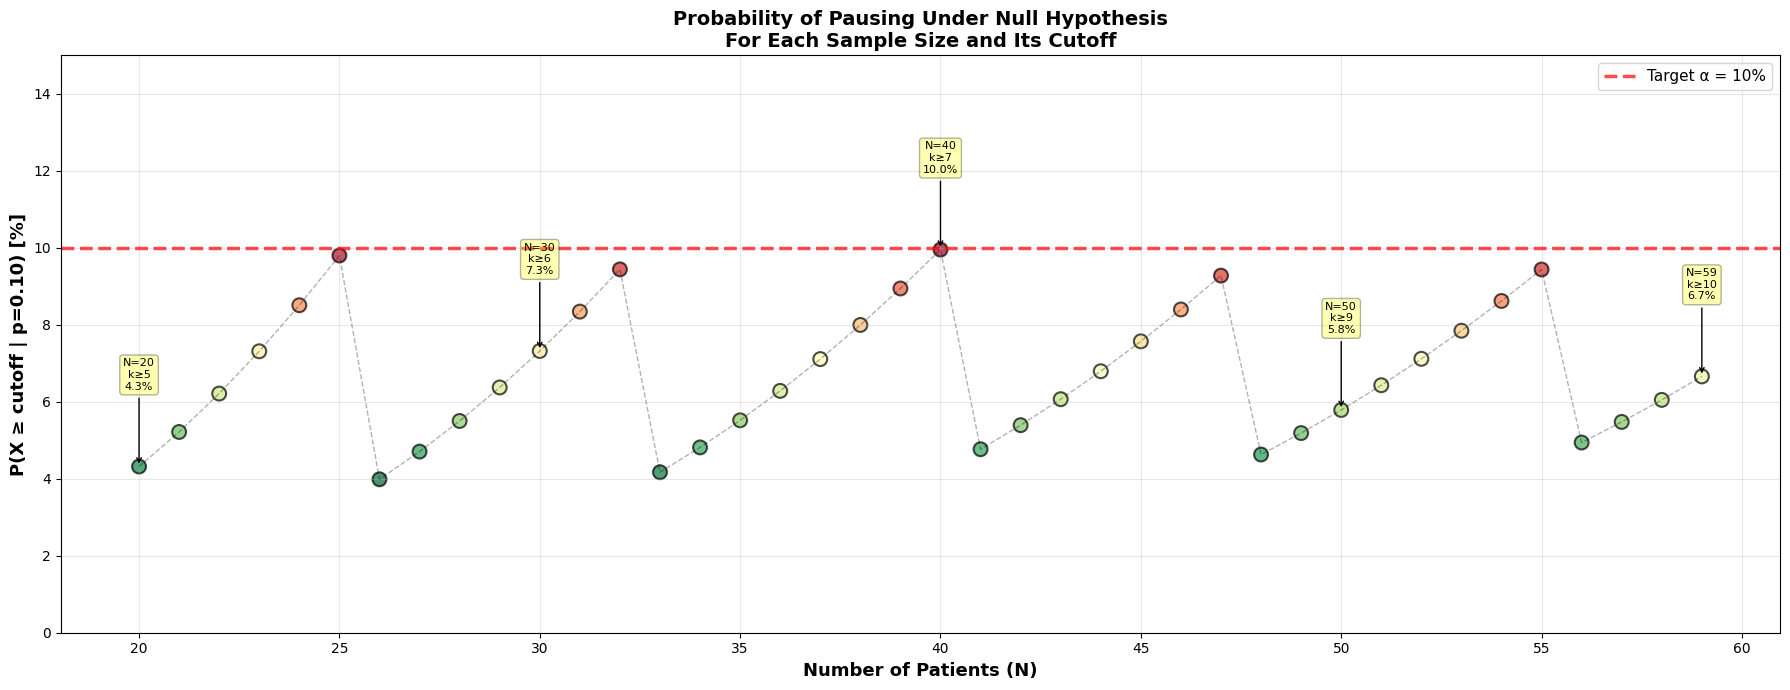


📊 SUMMARY STATISTICS:
  • Mean pause probability: 6.71%
  • Min pause probability: 3.99% (at N=26)
  • Max pause probability: 9.95% (at N=40)
  • Standard deviation: 1.70%

💡 All probabilities should be close to 10% (target Type I error rate)
   Deviation from 10% is due to discrete nature of binomial distribution


In [13]:
# ===== ADDITIONAL: CUTOFF PROBABILITY VISUALIZATION =====
# For each N and its cutoff, show P(X >= cutoff | N, p=0.10)

print("\n🎁 ADDITIONAL ANALYSIS: Probability of Observing Cutoff or More Events")
print("="*70)

# Extract data
N_vals = df_lookup['N'].values
cutoff_vals = df_lookup['Cutoff'].values
prob_vals = [1 - binom.cdf(c - 1, n, p_null) for n, c in zip(N_vals, cutoff_vals)]

# Create figure
fig, ax1 = plt.subplots(1,1, figsize=(18, 7))

# Plot probabilities
ax1.scatter(N_vals, [p*100 for p in prob_vals], s=100, alpha=0.7, 
            c=prob_vals, cmap='RdYlGn_r', edgecolors='black', linewidths=1.5)
ax1.plot(N_vals, [p*100 for p in prob_vals], 'k--', alpha=0.3, linewidth=1)

# Add horizontal line at 10%
ax1.axhline(10, color='red', linestyle='--', linewidth=2.5, 
            label='Target α = 10%', alpha=0.7)

# Labels and styling
ax1.set_xlabel('Number of Patients (N)', fontsize=13, fontweight='bold')
ax1.set_ylabel('P(X ≥ cutoff | p=0.10) [%]', fontsize=13, fontweight='bold')
ax1.set_title('Probability of Pausing Under Null Hypothesis\nFor Each Sample Size and Its Cutoff', 
              fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)
ax1.set_ylim(0, 15)

# Add annotations for key points
for n_anno in [20, 30, 40, 50, 59]:
    idx = list(N_vals).index(n_anno)
    ax1.annotate(f'N={n_anno}\nk≥{cutoff_vals[idx]}\n{prob_vals[idx]*100:.1f}%',
                 xy=(n_anno, prob_vals[idx]*100),
                 xytext=(n_anno, prob_vals[idx]*100 + 2),
                 fontsize=8, ha='center',
                 bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.3),
                 arrowprops=dict(arrowstyle='->', color='black', lw=1))


plt.tight_layout()
plt.show()

# Print summary statistics
print("\n📊 SUMMARY STATISTICS:")
print(f"  • Mean pause probability: {np.mean(prob_vals)*100:.2f}%")
print(f"  • Min pause probability: {np.min(prob_vals)*100:.2f}% (at N={N_vals[np.argmin(prob_vals)]})")
print(f"  • Max pause probability: {np.max(prob_vals)*100:.2f}% (at N={N_vals[np.argmax(prob_vals)]})")
print(f"  • Standard deviation: {np.std(prob_vals)*100:.2f}%")
print(f"\n💡 All probabilities should be close to 10% (target Type I error rate)")
print(f"   Deviation from 10% is due to discrete nature of binomial distribution")

---

## 🎁 **ADDITIONAL ANALYSIS** (This is useful yet, as we assume instantaneous events)


🎁 ADDITIONAL ANALYSIS: Power and Type I Error Visualization


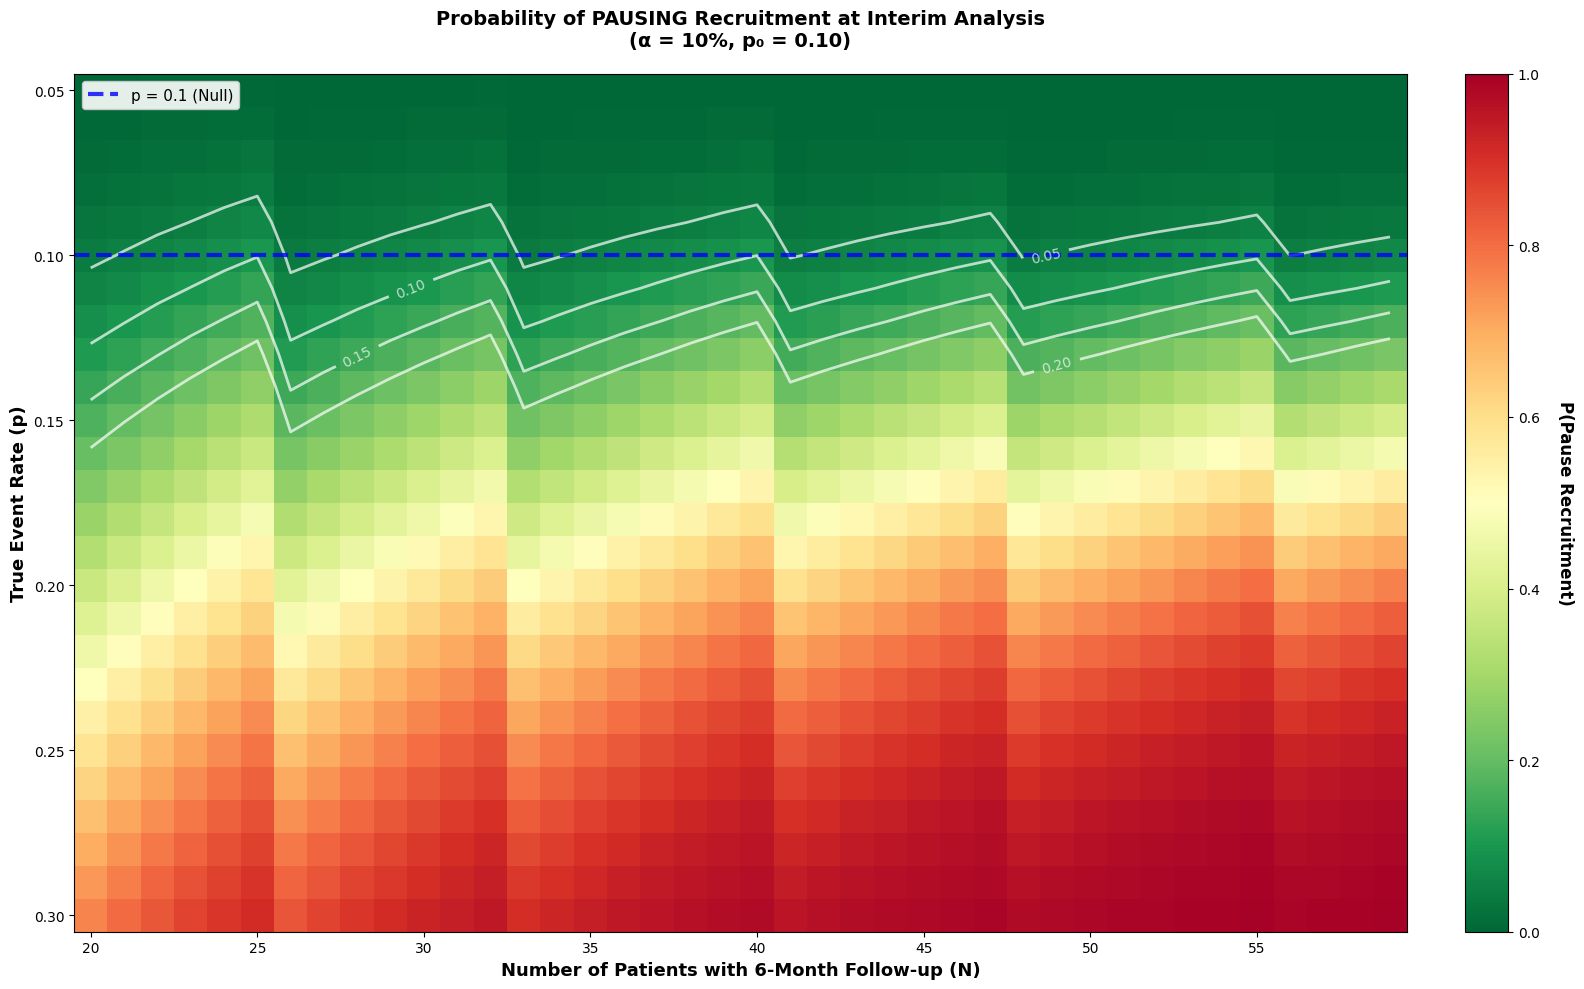


📊 KEY INSIGHTS FROM HEATMAP:
  • At p = 0.10 (null): ~10% chance of pausing (by design)
  • At p = 0.15: ~39.3% chance of pausing (N=40)
  • Higher N → Better discrimination between rates
  • Red (hot) = High probability of pause → Good for safety!
  • Green (cool) = Low probability of pause → Continues as planned


In [14]:
# ===== ADDITIONAL: PROBABILITY HEATMAP =====
# Shows P(pause) for different true event rates across sample sizes

print("\n🎁 ADDITIONAL ANALYSIS: Power and Type I Error Visualization")
print("="*70)

# Create matrix: rows = true event rate, columns = N
true_rates = np.arange(0.05, 0.31, 0.01)  # 5% to 30% in 1% increments
N_range = range(20, 60)

# Calculate probability of pausing for each combination
pause_prob_matrix = np.zeros((len(true_rates), len(N_range)))

for i, true_p in enumerate(true_rates):
    for j, N in enumerate(N_range):
        cutoff = int(binom.ppf(1 - alpha_interim, N, p_null) + 1)
        # P(pause) = P(X >= cutoff | N, true_p)
        pause_prob = 1 - binom.cdf(cutoff - 1, N, true_p)
        pause_prob_matrix[i, j] = pause_prob

# Create heatmap
fig, ax = plt.subplots(figsize=(16, 10))

im = ax.imshow(pause_prob_matrix, aspect='auto', cmap='RdYlGn_r', 
               interpolation='nearest', vmin=0, vmax=1)

# Set ticks and labels
ax.set_xticks(np.arange(0, len(N_range), 5))
ax.set_xticklabels([N_range[i] for i in range(0, len(N_range), 5)])
ax.set_yticks(np.arange(0, len(true_rates), 5))
ax.set_yticklabels([f'{true_rates[i]:.2f}' for i in range(0, len(true_rates), 5)])

# Labels
ax.set_xlabel('Number of Patients with 6-Month Follow-up (N)', fontsize=13, fontweight='bold')
ax.set_ylabel('True Event Rate (p)', fontsize=13, fontweight='bold')
ax.set_title('Probability of PAUSING Recruitment at Interim Analysis\n(α = 10%, p₀ = 0.10)', 
             fontsize=14, fontweight='bold', pad=20)

# Add colorbar
cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('P(Pause Recruitment)', rotation=270, labelpad=25, fontsize=12, fontweight='bold')

# Add contour lines for key probabilities
contours = ax.contour(pause_prob_matrix, levels=[0.05, 0.10, 0.15,0.20], 
                      colors='white', linewidths=2, alpha=0.7)
ax.clabel(contours, inline=True, fontsize=10, fmt='%0.2f')

# Mark the null hypothesis line
null_idx = np.argmin(np.abs(true_rates - 0.10))
ax.axhline(y=null_idx, color='blue', linestyle='--', linewidth=3, alpha=0.8, 
           label=f'p = {p_null} (Null)')


ax.legend(loc='upper left', fontsize=11, framealpha=0.9)

plt.tight_layout()
plt.show()

# Print key insights
print("\n📊 KEY INSIGHTS FROM HEATMAP:")
print(f"  • At p = 0.10 (null): ~10% chance of pausing (by design)")
print(f"  • At p = 0.15: ~{pause_prob_matrix[np.argmin(np.abs(true_rates - 0.15)), 20]*100:.1f}% chance of pausing (N=40)")
print(f"  • Higher N → Better discrimination between rates")
print("  • Red (hot) = High probability of pause → Good for safety!")
print("  • Green (cool) = Low probability of pause → Continues as planned")